# Assignment 1: Support Vector Machines

Student Name: <strong>Parthasarathy Rajendiran</strong> <br>
Student ID: <strong>8883828</strong>
<hr>

In [1]:
import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading Dataset

In [2]:
df = pd.read_csv('../../practical_labs/datasets/breast_cancer.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
df.describe(include='all').T.fillna('')

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,569.0,,,,30371831.432337,125020585.612224,8670.0,869218.0,906024.0,8813129.0,911320502.0
diagnosis,569.0,2,B,357,,,,,,,
radius_mean,569.0,,,,14.127292,3.524049,6.981,11.7,13.37,15.78,28.11
texture_mean,569.0,,,,19.289649,4.301036,9.71,16.17,18.84,21.8,39.28
perimeter_mean,569.0,,,,91.969033,24.298981,43.79,75.17,86.24,104.1,188.5
area_mean,569.0,,,,654.889104,351.914129,143.5,420.3,551.1,782.7,2501.0
smoothness_mean,569.0,,,,0.09636,0.014064,0.05263,0.08637,0.09587,0.1053,0.1634
compactness_mean,569.0,,,,0.104341,0.052813,0.01938,0.06492,0.09263,0.1304,0.3454
concavity_mean,569.0,,,,0.088799,0.07972,0.0,0.02956,0.06154,0.1307,0.4268
concave points_mean,569.0,,,,0.048919,0.038803,0.0,0.02031,0.0335,0.074,0.2012


In [5]:
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [6]:
df['target'] = np.where(df['diagnosis'] == 'M', 1, 0)

## Descriptive Analysis

#### Finding Correlations

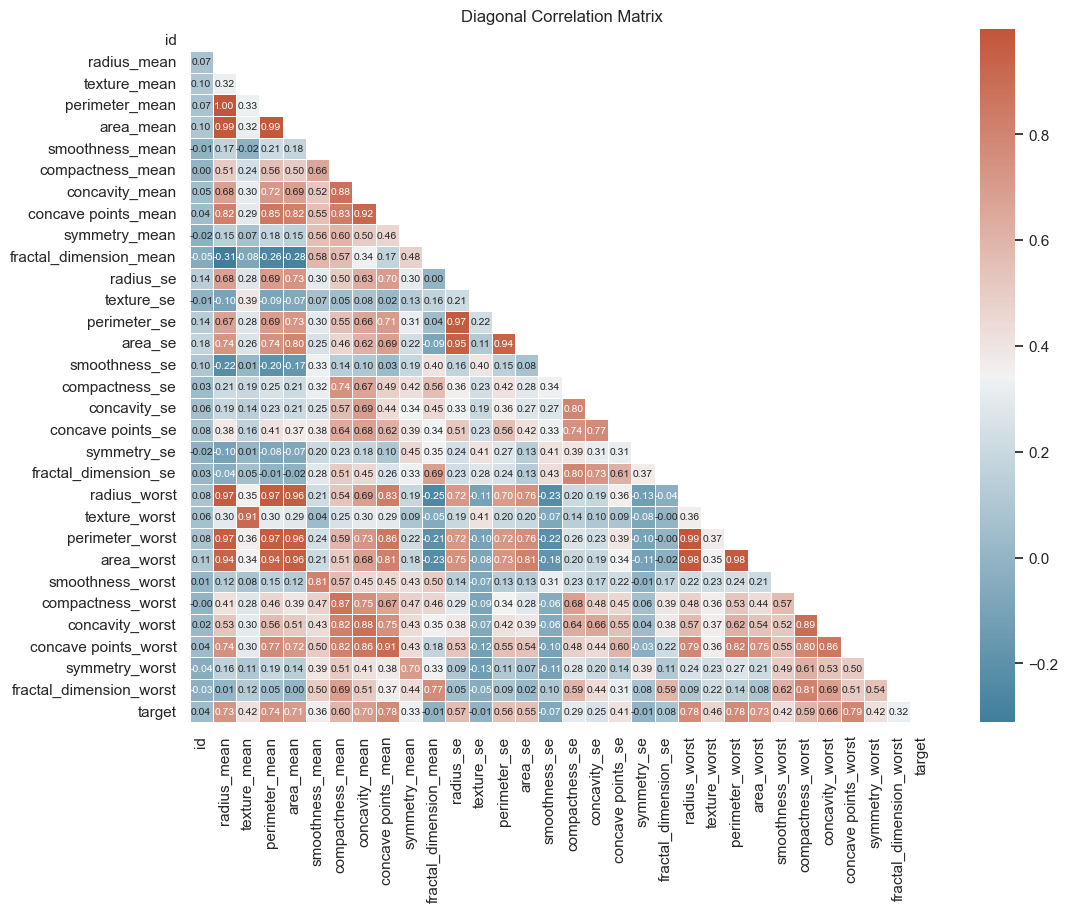

In [7]:
df_corr = df.select_dtypes('number').corr()

sns.set_theme(style='white')
mask = np.triu(np.ones_like(df_corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(df_corr, mask=mask, cmap=cmap, annot=True, fmt=".2f", annot_kws={"fontsize":7.5}, linewidths=.5, ax=ax)
plt.title('Diagonal Correlation Matrix')
plt.show()

#### Top correlated features

In [8]:
max_corr = df_corr.abs().unstack().sort_values(ascending=False)
pair_indices = [i for i in max_corr.index if i[0] != i[1]]  # Excluding self-correlation

print("\nFeatures with highest correlation:")
print(max_corr[pair_indices].head(10))


Features with highest correlation:
radius_mean      perimeter_mean     0.997855
perimeter_mean   radius_mean        0.997855
perimeter_worst  radius_worst       0.993708
radius_worst     perimeter_worst    0.993708
area_mean        radius_mean        0.987357
radius_mean      area_mean          0.987357
area_mean        perimeter_mean     0.986507
perimeter_mean   area_mean          0.986507
area_worst       radius_worst       0.984015
radius_worst     area_worst         0.984015
dtype: float64


The above pairs of features have high correlation among themselves. It is understandable that area and perimeter has high correlation with radius because they can be calculated from radius.

### Feature Scaling

## ML Model Training and Testing

In [23]:
# id column is not relevant for predicting
cols_to_exclude = ['id', 'diagnosis', 'target']
predictors = list(set(df.columns) - set(cols_to_exclude))

X = df[predictors]
y = df['target']

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[predictors] = scaler.fit_transform(df[predictors])
display(df)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,target
0,842302,M,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,1
1,842517,M,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,1
2,84300903,M,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,1
3,84348301,M,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,1
4,84358402,M,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,...,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091,1
565,926682,M,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,...,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978,1
566,926954,M,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,...,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409,1
567,927241,M,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,...,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635,1


### Train Test Split

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8883828)

print(f'The dataset of size {X.shape} has been splitted into')
print(f'Training   : {X_train.shape}')
print(f'Testing    : {X_test.shape}')

The dataset of size (569, 30) has been splitted into
Training   : (455, 30)
Testing    : (114, 30)


### Finding Class weights

In [27]:
y_train.value_counts(normalize=True)

target
0    0.628571
1    0.371429
Name: proportion, dtype: float64

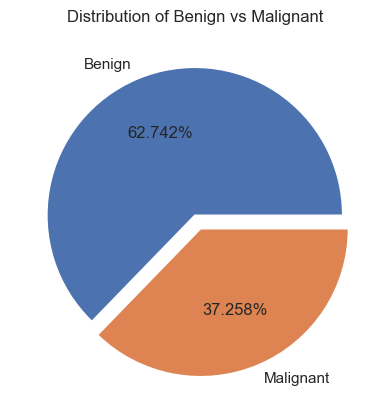

In [28]:
plt.pie(df['diagnosis'].value_counts(), autopct='%.3f%%', explode=[0, 0.1], labels=['Benign', 'Malignant'])
plt.title('Distribution of Benign vs Malignant')
plt.show()

In [29]:
from sklearn.utils.class_weight import compute_class_weight

In [30]:
class_weights = compute_class_weight('balanced', classes=y_train.unique(), y=y_train)
class_weights_dict = {0: class_weights[0], 1: class_weights[1]}
class_weights_dict

{0: 0.7954545454545454, 1: 1.3461538461538463}

### SVC Model

In [31]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

#### Base Model

In [32]:
base_model = SVC(class_weight=class_weights_dict)
base_model.fit(X_train, y_train)

SVC(class_weight={0: 0.7954545454545454, 1: 1.3461538461538463})

In [33]:
def show_metrics(y_actual, y_predicted):
    # Confusion Matrix
    conf_mat = confusion_matrix(y_actual, y_predicted)
    tn, fp, fn, tp = conf_mat.flatten()
    print(f'True Positive : {tp:>4}\t\tFalse Positive : {fp:>4}\nTrue Negative : {tn:>4}\t\tFalse Negative : {fn:>4}')
    
    # Metrics
    precision = precision_score(y_actual, y_predicted)
    recall = recall_score(y_actual, y_predicted)
    f1 = f1_score(y_actual, y_predicted)
    acc = accuracy_score(y_actual, y_predicted)

    print(
        f'\nPrecision : {precision:.4}\t\tF1 score  : {f1:.4}\nRecall    : {recall:.4}\t\tAccuracy  : {acc:.4%}'
    )

    # Plotting
    group_names = ['True -ve', 'False +ve', 'False -ve', 'True +ve']
    group_counts = [tn, fp, fn, tp]
    group_percentages = ['{0:.2%}'.format(i) for i in conf_mat.flatten()/np.sum(conf_mat)]
    labels = [
        f'{n}\n\n{c}\n\n{p}' for n, c, p in zip(group_names, group_counts, group_percentages)
    ]
    labels = np.asarray(labels).reshape(2, 2)

    plt.figure(figsize=(4.5, 3))
    ax = sns.heatmap(conf_mat, annot=labels, fmt='', cmap='Greens', linewidths=0.5, linecolor='Black')
    for _, spine in ax.spines.items():
        spine.set_visible(True)
    ax.set_title('Confusion Matrix')
    ax.set_xlabel('Predicted Values')
    ax.set_ylabel('Actual Values')
    ax.xaxis.set_ticklabels(['False', 'True'])
    ax.yaxis.set_ticklabels(['False', 'True'])
    plt.show()
    print(classification_report(y_actual, y_predicted))

In [34]:
y_pred = base_model.predict(X_test)

True Positive :   37		False Positive :    7
True Negative :   64		False Negative :    6

Precision : 0.8409		F1 score  : 0.8506
Recall    : 0.8605		Accuracy  : 88.5965%


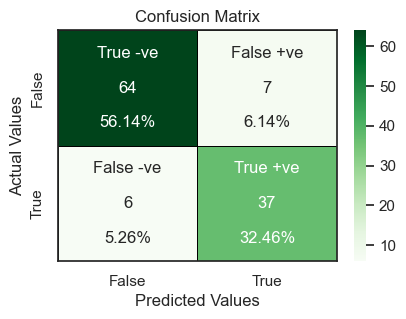

              precision    recall  f1-score   support

           0       0.91      0.90      0.91        71
           1       0.84      0.86      0.85        43

    accuracy                           0.89       114
   macro avg       0.88      0.88      0.88       114
weighted avg       0.89      0.89      0.89       114



In [35]:
show_metrics(y_test, y_pred)

#### Hyperparameter Tuning

In [20]:
from sklearn.model_selection import GridSearchCV

In [36]:
# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100, 1000], 
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 
    'degree': [2, 3]
}

In [37]:
grid_search = GridSearchCV(estimator=base_model, param_grid=param_grid, scoring='f1', cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=SVC(class_weight={0: 0.7954545454545454,
                                         1: 1.3461538461538463}),
             param_grid={'C': [0.1, 1, 10, 100, 1000], 'degree': [2, 3],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='f1')

In [38]:
results_df = pd.DataFrame(grid_search.cv_results_)
results_df[['mean_fit_time', 'mean_score_time', 'param_C', 'param_degree', 'param_kernel', 'mean_test_score', 'rank_test_score']].sort_values('rank_test_score')

,mean_fit_time,mean_score_time,param_C,param_degree,param_kernel,mean_test_score,rank_test_score
16,7.964072,0.007395,10,2,linear,0.947130,1
20,7.889245,0.010070,10,3,linear,0.947130,1
34,0.005798,0.003194,1000,2,rbf,0.943976,3
38,0.001305,0.010276,1000,3,rbf,0.943976,3
28,12.022440,0.004295,100,3,linear,0.941584,5
24,14.748825,0.009575,100,2,linear,0.941584,5
12,2.113631,0.011188,1,3,linear,0.935582,7
8,1.662978,0.009132,1,2,linear,0.935582,7
36,20.037343,0.006257,1000,3,linear,0.933698,9
32,21.840539,0.003126,1000,2,linear,0.933698,9


### TOP performing Hyperparameters


In [39]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'C': 10, 'degree': 2, 'kernel': 'linear'}


1. <u>C = 10</u><br>   
It is the Regularization parameter and it determines how strict the model is in allowing misclassification errors. This is used for the trade-off between maximizing margin and minimizing errors.  
The larger C values give more priority in minimizing errors which is resulting in narrow margin (However the ideal goal of the SVM model is to maximize the margin).  
The smaller C values allow more misclassified points but giving more priority to maximizing the margin. (However in any algorithm, the less the error the better the model).  
`C = 10` could be the moderate regularization balancing both margin maximization and reducing misclassification.    
<br><br>
2. <u>kernel = 'linear'</u><br>  
The `linear` kernel is chosen as a best hyperparameter which indicates the benign and malignant data points are linearly separable.  
Most of the columns have strong correlation with the target column shows their linear relationship with the target.  <br><br>
3. <u>degree</u><br>
The GridSearchCV best parameters returns the degree=2. However, it has nothing to do with Linear SVM and it is considered only for Poly kernel and for all the other kernels it will be ignored.

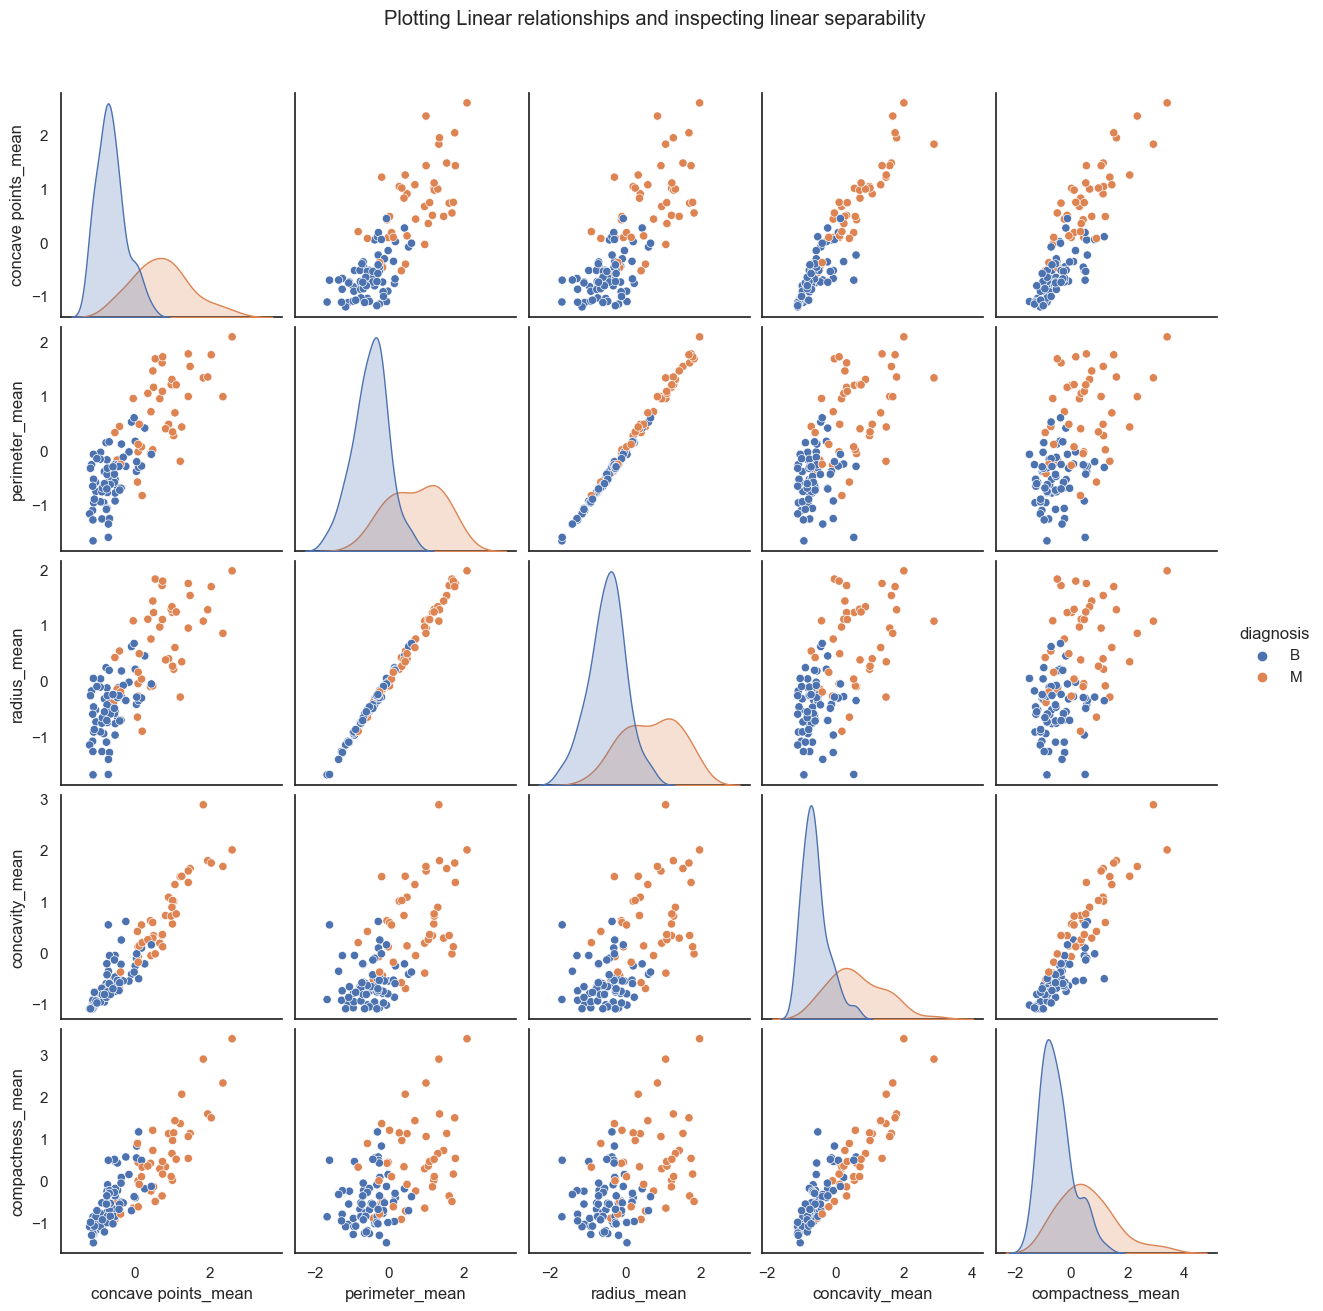

In [40]:
selected_cols = ['concave points_mean', 'perimeter_mean', 'radius_mean', 'concavity_mean', 'compactness_mean']
ax = sns.pairplot(df.loc[X_test.index, ['diagnosis', *selected_cols]], hue='diagnosis', vars=selected_cols, diag_kind='kde')
ax.fig.suptitle('Plotting Linear relationships and inspecting linear separability', y=1.05)
plt.show()

In [41]:
best_model = grid_search.best_estimator_

### Predicting with the hyperparameter tuned model

True Positive :   42		False Positive :    1
True Negative :   70		False Negative :    1

Precision : 0.9767		F1 score  : 0.9767
Recall    : 0.9767		Accuracy  : 98.2456%


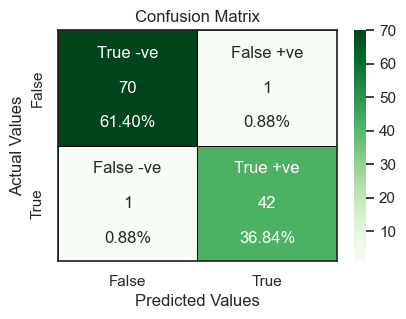

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [42]:
y_pred = best_model.predict(X_test)
show_metrics(y_test, y_pred)

The performance is very much improved from the baseline model with the best hyperparameters identified by GridsearchCV. 
<hr>